## Feed forward neural network

In [20]:
import os
import sys
from data_processing import process_dataframe

In [21]:
import os
#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")  # specify to ignore warning messages

### Load dataset

deal with class imbalance by doing transformers and subsampling of epsilon. see MLP_model.ipynb for the analysis

In [22]:
(df_train_scaled_range, df_val_scaled_range, df_test_scaled_range,
 y_train_transformed, y_val_transformed, y_test_transformed
) = process_dataframe()

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define input shape
input_shape = df_train_scaled_range.shape[1]

# define model layers
model = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(20, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Train the model
history = model.fit(
    df_train_scaled_range, y_train_transformed,
    validation_data=(df_val_scaled_range, y_val_transformed),
    epochs=10,
    batch_size=16,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    ],
    verbose=1
)

# Evaluate on test set
test_loss, test_mae = model.evaluate(df_test_scaled_range, y_test_transformed)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Predict on test set
y_pred = model.predict(df_test_scaled_range)

Epoch 1/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step - loss: 0.9342 - mae: 0.7805 - val_loss: 0.7944 - val_mae: 0.7174
Epoch 2/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - loss: 0.8186 - mae: 0.7301 - val_loss: 0.7748 - val_mae: 0.7057
Epoch 3/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - loss: 0.7976 - mae: 0.7190 - val_loss: 0.7620 - val_mae: 0.6977
Epoch 4/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - loss: 0.7845 - mae: 0.7116 - val_loss: 0.7488 - val_mae: 0.6918
Epoch 5/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - loss: 0.7779 - mae: 0.7085 - val_loss: 0.7427 - val_mae: 0.6876
Epoch 6/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - loss: 0.7723 - mae: 0.7046 - val_loss: 0.7381 - val_mae: 0.6838
Epoch 7/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - loss: 0.7693 - mae: 0.7014 - val_loss: 0.7293 - val_mae: 0.6815
Epoch 8/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - loss: 0.7663 - mae: 0.7000 - val_loss: 0.7334 - val_mae: 0.6797
Epoch 9/10
4314/4314 ━━━

In [24]:
from sklearn.metrics import r2_score

# Compute R² score
r2 = r2_score(y_test_transformed, y_pred)

# Print R² score
print(f"R² Score: {r2:.4f}")


R² Score: 0.2754


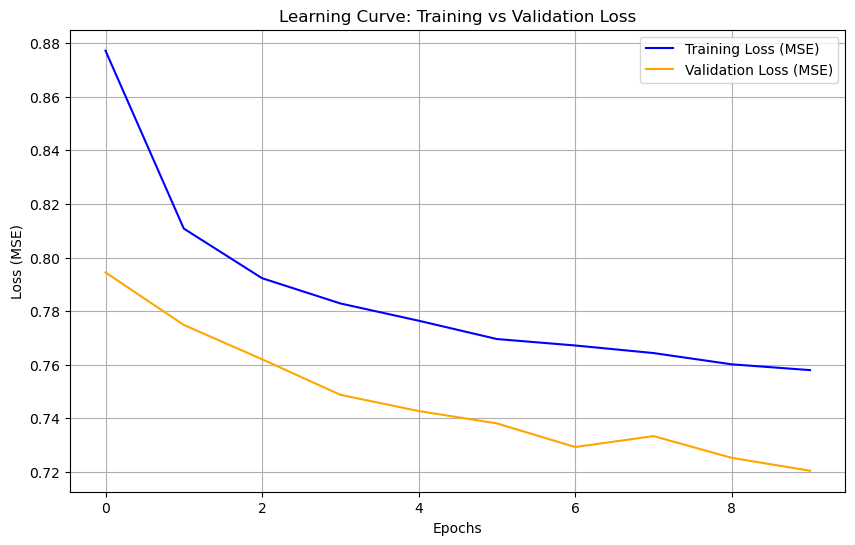

In [25]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (MSE)', color='blue')
plt.plot(val_loss, label='Validation Loss (MSE)', color='orange')
plt.title('Learning Curve: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


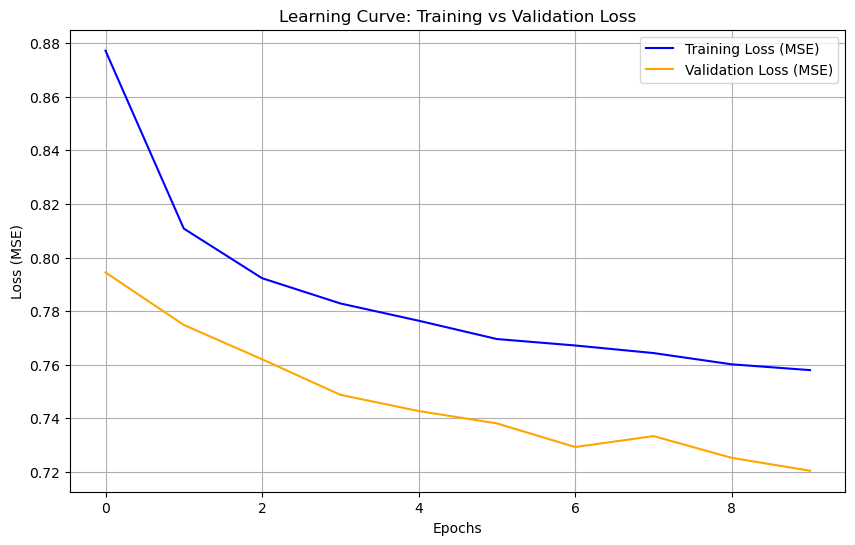

In [26]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (MSE)', color='blue')
plt.plot(val_loss, label='Validation Loss (MSE)', color='orange')
plt.title('Learning Curve: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


# Improve model

## Experiment with layers

In [27]:
# Adding more layers
model_2 = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Output layer
])

model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_2 = model_2.fit(
    df_train_scaled_range, y_train_transformed,
    validation_data=(df_val_scaled_range, y_val_transformed),
    epochs=10,
    batch_size=16,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
    verbose=1
)

# Evaluate
test_loss_2, test_mae_2 = model_2.evaluate(df_test_scaled_range, y_test_transformed)
y_pred_2 = model_2.predict(df_test_scaled_range)
r2_2 = r2_score(y_test_transformed, y_pred_2)

print(f"Model 2 - Test MSE: {test_loss_2:.4f}, Test MAE: {test_mae_2:.4f}, R² Score: {r2_2:.4f}")

Epoch 1/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 363us/step - loss: 0.8742 - mae: 0.7499 - val_loss: 0.6774 - val_mae: 0.6616
Epoch 2/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - loss: 0.7042 - mae: 0.6729 - val_loss: 0.6261 - val_mae: 0.6306
Epoch 3/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - loss: 0.6752 - mae: 0.6535 - val_loss: 0.6150 - val_mae: 0.6282
Epoch 4/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 350us/step - loss: 0.6632 - mae: 0.6452 - val_loss: 0.6165 - val_mae: 0.6279
Epoch 5/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - loss: 0.6589 - mae: 0.6439 - val_loss: 0.6106 - val_mae: 0.6224
Epoch 6/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step - loss: 0.6550 - mae: 0.6403 - val_loss: 0.6091 - val_mae: 0.6224
Epoch 7/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - loss: 0.6519 - mae: 0.6376 - val_loss: 0.5991 - val_mae: 0.6145
Epoch 8/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - loss: 0.6517 - mae: 0.6378 - val_loss: 0.6047 - val_mae: 0.6165
Epoch 9/10
4314/4314 ━━━

In [28]:
# Adding more layers to create Model 3
model_3 = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(100, activation='relu'),  # Increased the number of units per layer
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu'),  # Added another layer
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu'),  # Another layer
    layers.Dropout(0.3),
    layers.Dense(1)  # Output layer
])

model_3.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_3 = model_3.fit(
    df_train_scaled_range, y_train_transformed,
    validation_data=(df_val_scaled_range, y_val_transformed),
    epochs=10,
    batch_size=16,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
    verbose=1
)

# Evaluate Model 3
test_loss_3, test_mae_3 = model_3.evaluate(df_test_scaled_range, y_test_transformed)
y_pred_3 = model_3.predict(df_test_scaled_range)
r2_3 = r2_score(y_test_transformed, y_pred_3)

print(f"Model 3 - Test MSE: {test_loss_3:.4f}, Test MAE: {test_mae_3:.4f}, R² Score: {r2_3:.4f}")


Epoch 1/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 3s 525us/step - loss: 0.8433 - mae: 0.7344 - val_loss: 0.6719 - val_mae: 0.6569
Epoch 2/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 538us/step - loss: 0.7137 - mae: 0.6749 - val_loss: 0.6573 - val_mae: 0.6437
Epoch 3/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 524us/step - loss: 0.6948 - mae: 0.6642 - val_loss: 0.6588 - val_mae: 0.6494
Epoch 4/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 509us/step - loss: 0.6903 - mae: 0.6621 - val_loss: 0.6662 - val_mae: 0.6541
Epoch 5/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 517us/step - loss: 0.6952 - mae: 0.6630 - val_loss: 0.6506 - val_mae: 0.6481
Epoch 6/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 512us/step - loss: 0.6844 - mae: 0.6571 - val_loss: 0.6373 - val_mae: 0.6395
Epoch 7/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 480us/step - loss: 0.6806 - mae: 0.6546 - val_loss: 0.6342 - val_mae: 0.6321
Epoch 8/10
4314/4314 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step - loss: 0.6780 - mae: 0.6540 - val_loss: 0.6356 - val_mae: 0.6350
Epoch 9/10
4314/4314 ━━━

# improve model 2
Hyperparameter tuning and activation functions

In [30]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

# Define the model with hyperparameters
def build_model(hp):
    model = keras.Sequential()

    # Input layer
    model.add(layers.Input(shape=(input_shape,)))

    # Hyperparameter tuning for the number of units in the dense layer
    for i in range(hp.Int('num_layers', 1, 3)):  # Tune between 1 and 3 layers
        model.add(layers.Dense(
            hp.Int('units_' + str(i), min_value=32, max_value=128, step=32),  # Tune number of units
            activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid']),  # Tune activation function
        ))
        model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))  # Tune dropout rate

    # Output layer
    model.add(layers.Dense(1))  # Output layer for regression, no activation function

    # Compile model with Adam optimizer
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss='mse',  # Mean Squared Error loss for regression
        metrics=['mae']  # Mean Absolute Error metric
    )
    
    return model

In [ ]:
# Keras Tuner Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='tf_trials',
    project_name='hyperparameter_tuning',
)

# hyperparameter search
tuner.search(
    df_train_scaled_range, y_train_transformed,  # Training data
    epochs=10,  # Maximum number of epochs
    batch_size=16,  # Batch size
    validation_data=(df_val_scaled_range, y_val_transformed),  # Validation data
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
)

Trial 30 Complete [00h 00m 14s]
val_loss: 0.6129689812660217

Best val_loss So Far: 0.5810200572013855
Total elapsed time: 00h 03m 23s


In [ ]:
# best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

test_loss, test_mae = best_model.evaluate(df_test_scaled_range, y_test_transformed)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Best Hyperparameters: {'num_layers': 3, 'units_0': 32, 'activation': 'relu', 'dropout': 0.2, 'units_1': 64, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'units_2': 32, 'tuner/trial_id': '0012'}
724/724 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.7961 - mae: 0.6724
Test MSE: 0.5957
Test MAE: 0.5984


In [ ]:
print("\nBest Model Architecture:")
best_model.summary()


Best Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,349 (52.15 KB)

 Trainable params: 4,449 (17.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,900 (34.77 KB)

Best Hyperparameters: {'num_layers': 3, 'units_0': 32, 'activation': 'relu', 'dropout': 0.2, 'units_1': 64, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'units_2': 32, 'tuner/trial_id': '0012'}
Epoch 1/50
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - loss: 0.6083 - mae: 0.6142 - val_loss: 0.5594 - val_mae: 0.5848
Epoch 2/50
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - loss: 0.6059 - mae: 0.6134 - val_loss: 0.5593 - val_mae: 0.5880
Epoch 3/50
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 0.6022 - mae: 0.6113 - val_loss: 0.5651 - val_mae: 0.5907
Epoch 4/50
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - loss: 0.6006 - mae: 0.6093 - val_loss: 0.5689 - val_mae: 0.5921
Epoch 5/50
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - loss: 0.6008 - mae: 0.6103 - val_loss: 0.5603 - val_mae: 0.5897
Epoch 6/50
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - loss: 0.5983 - mae: 0.6090 - val_loss: 0.5662 - val_mae: 0.5949
Epoch 7/50
2157/2157 ━━━━━━━━━━━━━━

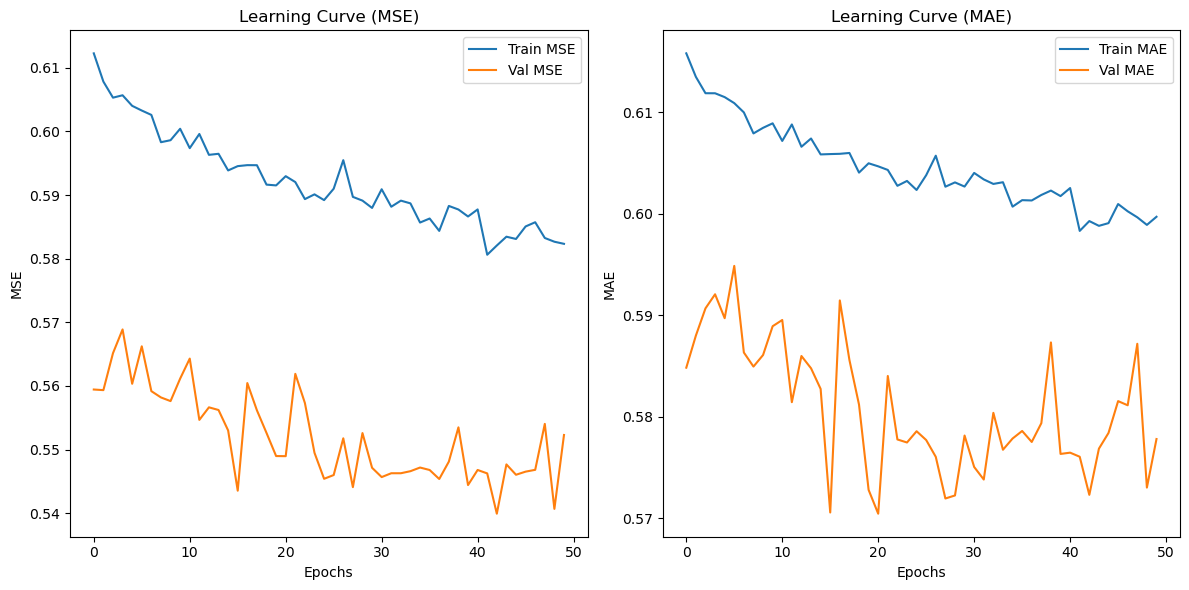

In [ ]:
# Get the best model and hyperparameters from the tuner
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

history = best_model.fit(
    df_train_scaled_range, y_train_transformed,
    validation_data=(df_val_scaled_range, y_val_transformed),
    epochs=50,
    batch_size=32,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
    verbose=1
)

# Extract training and validation loss and MAE from the history
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_mae = history_dict['mae']
val_mae = history_dict['val_mae']

plt.figure(figsize=(12, 6))

# Plot MSE (loss) for training and validation
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train MSE')
plt.plot(val_loss, label='Val MSE')
plt.title('Learning Curve (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_mae, label='Train MAE')
plt.plot(val_mae, label='Val MAE')
plt.title('Learning Curve (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Predict and r2 score
y_pred_best = best_model.predict(df_test_scaled_range)

r2_best = r2_score(y_test_transformed, y_pred_best)
print(f"R² Score: {r2_best:.4f}")

724/724 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step
R² Score: 0.4509


# argument for semi large size of batches

In [ ]:
# Experiment with a higher batch size
model_2_batch_size = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Output layer
])

model_2_batch_size.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_2_batch_size = model_2_batch_size.fit(
    df_train_scaled_range, y_train_transformed,
    validation_data=(df_val_scaled_range, y_val_transformed),
    epochs=10,
    batch_size=32,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)],
    verbose=1
)

test_loss_2_batch_size, test_mae_2_batch_size = model_2_batch_size.evaluate(df_test_scaled_range, y_test_transformed)
y_pred_2_batch_size = model_2_batch_size.predict(df_test_scaled_range)
r2_2_batch_size = r2_score(y_test_transformed, y_pred_2_batch_size)

print(f"Model 2 (batch size 32) - Test MSE: {test_loss_2_batch_size:.4f}, Test MAE: {test_mae_2_batch_size:.4f}, R² Score: {r2_2_batch_size:.4f}")

Epoch 1/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - loss: 0.8803 - mae: 0.7539 - val_loss: 0.6903 - val_mae: 0.6701
Epoch 2/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - loss: 0.7161 - mae: 0.6781 - val_loss: 0.6541 - val_mae: 0.6457
Epoch 3/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - loss: 0.6768 - mae: 0.6555 - val_loss: 0.6140 - val_mae: 0.6233
Epoch 4/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - loss: 0.6551 - mae: 0.6423 - val_loss: 0.5985 - val_mae: 0.6110
Epoch 5/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - loss: 0.6461 - mae: 0.6369 - val_loss: 0.5961 - val_mae: 0.6086
Epoch 6/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - loss: 0.6408 - mae: 0.6323 - val_loss: 0.5808 - val_mae: 0.5998
Epoch 7/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - loss: 0.6295 - mae: 0.6272 - val_loss: 0.5823 - val_mae: 0.6019
Epoch 8/10
2157/2157 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - loss: 0.6340 - mae: 0.6265 - val_loss: 0.5984 - val_mae: 0.6051
Epoch 9/10
2157/2157 ━━━